In [44]:
import torch
import torchbearer
import numpy as np
from os.path import exists
import torch.utils.data as Data
import torchvision.transforms
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [40]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

# fix random seed for reproducibility
seed = 7
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(seed)


# flatten 28*28 images to a 784 vector for each image
transform = transforms.Compose([
    transforms.ToTensor(),  # convert to tensor
    transforms.Lambda(lambda x: x.view(-1))  # flatten into vector
])

# load data
trainset = MNIST(".", train=True, download=True, transform=transform)
valset = MNIST(".", train=False, download=True, transform=transform)

# create data loaders (Split data into batches)
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
valloader = DataLoader(valset, batch_size=128, shuffle=True)


# define baseline model
class BaselineModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__() # BaselineModel, self
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        if not self.training:
            out = F.softmax(out, dim=1)
        return out



In [43]:
import torchbearer
import time

device = "cuda:0" if torch.cuda.is_available() else "cpu"

# build the model
model = BaselineModel(784, 784, 10).to(device)

# define the loss function and the optimiser
loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters())

# Construct a trial object with the model, optimiser and loss.
# Also specify metrics we wish to compute.
trial = torchbearer.Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy','top_5_acc']).to(device)   #

# Provide the data to the trial
trial.with_generators(trainloader, val_generator=valloader)

# Run 10 epochs of training
result = trial.run(epochs=10)
#result

(Text(0.5, 1.0, 'Loss'), <matplotlib.legend.Legend at 0x20d66b34508>, None)

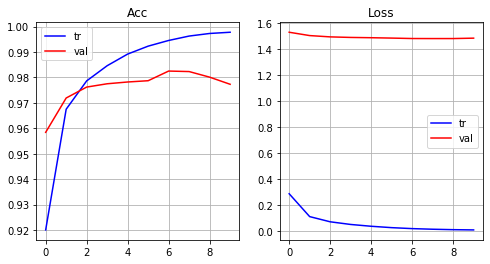

In [45]:
train_acc = []
val_acc = []
train_loss = []
val_loss = []
for i in range(len(result)):
    train_acc.append(result[i]['acc'])
    val_acc.append(result[i]['val_acc'])
    train_loss.append(result[i]['loss'])
    val_loss.append(result[i]['val_loss'])
    


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].plot(range(len(result)), train_acc, c='blue',label='tr')
ax[0].plot(range(len(result)), val_acc,c='red',label='val')
ax[0].set_title('Acc'),ax[0].legend(),ax[0].grid(True)

ax[1].plot(range(len(result)), train_loss, c='blue',label='tr')
ax[1].plot(range(len(result)), val_loss,c='red',label='val')
ax[1].set_title('Loss'),ax[1].legend(),ax[1].grid(True)


In [46]:
train_acc = torch.zeros([8,10])
test_acc = torch.zeros([8,10])
train_loss = torch.zeros([8,10])
test_loss = torch.zeros([8,10])


for i in range(8):
    
    model2 = BaselineModel(784, ((i+1)**2)*784, 10)
    loss_function = nn.CrossEntropyLoss()
    optimiser = optim.SGD(model2.parameters(), lr=0.01, momentum=0.9)
    #optimiser = optim.Adam(model2.parameters())
    trial = torchbearer.Trial(model2, optimiser, loss_function, metrics=['loss', 'accuracy'])  
    # Provide the data to the trial
    trial.with_generators(trainloader, val_generator=testloader)
    # Run 10 epochs of training
    result = trial.run(epochs=10)
    for j in range(10):
        #test the performance
        train_acc[i,j] = result[j]['acc']
        train_loss[i,j] = result[j]['loss']
        val_acc[i,j] = result[j]["val_acc"]
        val_loss[i,j] = result[j]["val_loss"]

KeyboardInterrupt: 

In [195]:
model2 = BaselineModel(784, 250000, 10)
loss_function = nn.CrossEntropyLoss()
optimiser = optim.SGD(model2.parameters(), lr=0.01, momentum=0.9)
#optimiser = optim.Adam(model2.parameters())
trial = torchbearer.Trial(model2, optimiser, loss_function, metrics=['loss', 'accuracy'])
# Provide the data to the trial
trial.with_generators(trainloader, test_generator=testloader)


tra = torch.zeros(10)
trl = torch.zeros(10)
tea = torch.zeros(10)
tel = torch.zeros(10)

for j in range(1,11):
    tr = trial.run(epochs=j)
    test_result = trial.evaluate(data_key=torchbearer.TEST_DATA)

    #test the performance
    tra[j-1] = tr[-1]['acc']
    trl[j-1] = tr[-1]['loss']

    tea[j-1] = test_result["test_acc"]
    tel[j-1] = test_result["test_loss"]
    print(train_acc)

KeyboardInterrupt: 

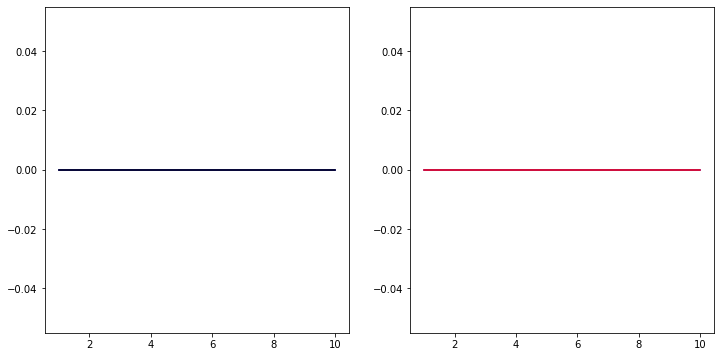

In [196]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

#ax[0].plot(torch.arange(1,11), train_acc[0,:], c='blue')
ax[0].plot(torch.arange(1,11), test_loss[3,:],color='green', label='1')
ax[0].plot(torch.arange(1,11), test_loss[4,:],color='red', label='2')
ax[0].plot(torch.arange(1,11), test_loss[5,:],color='skyblue', label='3')
ax[0].plot(torch.arange(1,11), test_loss[6,:],color='blue', label='4')
ax[0].plot(torch.arange(1,11), test_loss[7,:],color='black', label='5')




ax[1].plot(torch.arange(1,11), train_loss[0,:], c='blue')
ax[1].plot(torch.arange(1,11), test_loss[0,:],c='red')


In [118]:
a=np.array([12,3,4,6,7,13,21])

c = np.where(a >= 4)
a[c]

array([12,  4,  6,  7, 13, 21])